
*   https://www.youtube.com/watch?v=W8AeOXa_FqU&ab_channel=DotCSV
*   https://www.aprendemachinelearning.com/una-sencilla-red-neuronal-en-python-con-keras-y-tensorflow/
*   https://unipython.com/desarrolla-primera-red-neural-python-keras-paso-paso/
*   https://rua.ua.es/dspace/bitstream/10045/93593/1/Recopilacion_de_informacion_sobre_futbol_y_prediccion_Bardisa_Serrano_Adrian.pdf
*   https://www.aprendemachinelearning.com/pronostico-de-series-temporales-con-redes-neuronales-en-python/
*  https://anderfernandez.com/blog/como-programar-una-red-neuronal-desde-0-en-python/


#Creando una red neuronal propia v1
con inferencia 100%


##P1. importando librerias

In [1]:
import numpy as np    #procesamiento numerico
import scipy as sc    #extensión de numpy 
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles    #nos permite crear un dataset

##P2. creando el dataset

dataset X= (500, 2)
dataset Y= (500, 1)


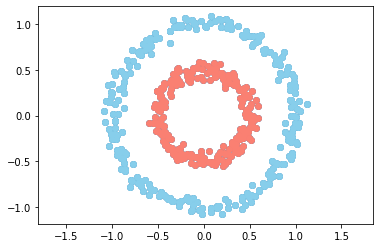

In [2]:
#make_circles?    #para ver como se usa la funcionalidad
n = 500  # 500 elementos, ejemplo: personas
p = 2    # 2 caracteristicas de cada uno de los 500 elementos, ejemplo: edad, altura, sexo, peso...etc
# x= puntos en (x,y) del eje carteciano
# y= valores binarios (0,1) que dicen que pertenecen al ciclo interno o externo
X, Y= make_circles(n_samples=n, factor=0.5, noise=0.05)   #factor= distancia entre los circulos, noise= ruido
Y= Y[:, np.newaxis]      #agregamos una dimensión para que quede igual que X
print("dataset X= {}".format(X.shape))
print("dataset Y= {}".format(Y.shape))
#visualizamos el dataset
plt.scatter(X[:,0], X[:,1])  #todos los puntos en la primera coordenada en X y los segundos puntos en coordenada Y
#mejoramos el grafico (agreamos color)
plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1],c="skyblue")  
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1],c="salmon")  
plt.axis("equal")   #los ejes X y Y sean iguales
plt.show()


##P3. creando una red neuronal

In [3]:
#estructura de datos de la red:
#  parametros de entrada
#  conexiones entre las capas      = n_conn
#  número de neuronas en las capas = n_neur 
#  funcion de activación           = f_activar

#clase de la capa de la red
class neural_layer():
  def __init__(self, n_conn, n_neur,f_activar):
    self.f_activar=f_activar
    self.b = np.random.rand(1,n_neur)*2 -1   #vector parametro de bayas (layers de la red neuronal )valores entre -1 y 1
    self.W = np.random.rand(n_conn,n_neur)*2 -1   #matriz layer (conexiones son tantas como neuronas en cada capa)


###P3.1 funciones de activación

In [4]:
#funciones de activación de las neuronas
#funcion sigmoide (s)
sigm= lambda x: 1/(1+np.e**(-x))   #modo funcion anonima en python (es una función sin nombre)
# podemos compertir sigm en dos funciones
sigm= (lambda x: 1/(1+np.e**(-x)),   # funciones sigmoide
       lambda x:  x* (1-x))          # derivada de la funcion sigmoide

relu = lambda x: np.maximum(0,x)     # todos los valores que sean negativos seran cero
      

###P3.2 funcion de coste (error cuadratico medio = L2)

In [5]:
l2_cost = (lambda Yp, Yr :np.mean((Yp-Yr)**2),    #obtiene error cuadratico medio de la diferencia entre Yp: valor predicho, Yr: valor real
           lambda Yp, Yr :(Yp - Yr))              #derivada de la funcion de error cuadratico medio         

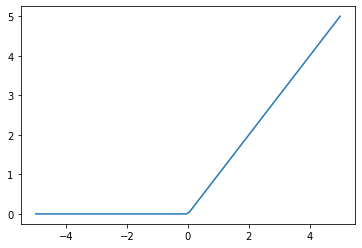

In [6]:
#probemos la función sigmoide
_x= np.linspace(-5,5, 100)   #creamos un vector del 100 posiciones con valores desde -5 a 5
_x
#plt.plot (_x, sigm[0](_x))  #funcion sigmoide
#plt.plot (_x, sigm[1](_x))  #derivada de la funcion sigmoide
plt.plot (_x, relu(_x))  #derivada de la funcion sigmoide

##P4. Creamos la red

In [7]:
#metodo manual
l0= neural_layer(p,4,sigm)   #capa 0 con p (numero de entradas)
l1= neural_layer(4,8,sigm)   #capa 1

In [8]:
#metodo automatico 

def create_nn(topology, f_activar):
 
  nn=[]                                                             #capas de la red neuronla (nn)
  for l, layer in enumerate(topology[:-1]):                         #recorra el vector hasta el ultimo valor 
    nn.append(neural_layer(topology[l],topology[l+1], f_activar))   #creamos cada una de las capas
  return nn

##P5. creamos la funcion de entrenamiento (train)

In [ ]:
#le entregamos a la nn un parametro de entrada y como es la salida y ella solita aprende
#  a asignar pesos hacia adelante aplicando sumas ponderadas y funciones de activación (sigm) para obtener un valor randomico
# aplicando una funcion de coste (error cuadratico medio = L2 ) comparamos el valor de salida randomico - valor real y obtenemos el valor de error
# tomamos ese error y aplicamos el algoritmo de back_propagation para calcular las derivadas parciales que usaremos para
# usar el algoritmo de descenso por gradiente que nos permitra optimizar el error de coste y con ello entrenamos la nn.

#topology=[p,4,8,16,8,4,1]                #cantidad de neuronas en cada capa (muchas capas para tan pocos datos)
topology=[p,4,8,1]                        #cantidad de neuronas en cada capa
neural_net= create_nn(topology, sigm)            #nn con 6 capas ocultas del tipo neural_layer


def train(neural_net, X, Y, l2_cost,lr=0.05, train=True):     #lr= define en que grado de actualización los parametros en base al descenso gradiente (muy bajo= train lento, muy alto=nunca converge la red )
  #forward pass (hacia adelante), pasamos el vector de entrada y lo pasamos capa por capa
  
  #capa 0
  z= X@ neural_net[0].W + neural_net[0].b    #suma ponderada en la primera capa
  a= neural_net[0].f_activar[0](z)              #ejecutamos la activación usando la funcion sigm [parametro 0] para la capa 0
  
  #vector con los resultados de las capas [(z0, a0)],[(z1,a1)]...[(zn,an)]
  out=[(None,X)]    #cargamos un valor inicial que se usara en la primera capa (entrada)
  #de forma automatica usando un blucle for
  for l, layer in enumerate(neural_net): 
    z= out[-1][1] @ neural_net[l].W + neural_net[l].b    #suma ponderada en la primera capa
    a= neural_net[l].f_activar[0](z)                    #ejecutamos la activación usando la funcion sigm[0] para la capa 0
    out.append((z, a))
  #print(out[-1][1])
  #print("costo del aprendizaje ={}".format(l2_cost[0](out[-1][1],Y)))
  
  #backwards pass  + Gradian Descent
  if train:
    deltas=[]
    
    for l in reversed(range(0, len(neural_net))):  #vamos hacia atras para programar el error y ejecutar (derivada+descenso gradiente)
      z= out[l+1][0]
      a= out[l+1][1]

      #print("tamaño de las capa {} = {}".format(l, a.shape))
      if l==len(neural_net)-1:                   #si es la ultima capa no se debe programar el error xq es el mismo de la función de coste
        deltas.insert(0,l2_cost[1](a,Y)* neural_net[l].f_activar[1](a))  # deltas[0]= agregamos el valor del coste por la derivada de la funcion de activación de la ultima capa
      else:
        #print(deltas[0].shape, _W.shape)
        deltas.insert(0,deltas[0] @ _W.T * neural_net[l].f_activar[1](a))  # deltas[1>]= agregamos el valor del coste por la derivada de la funcion de activación de la capa anterior
      
      _W = neural_net[l].W      #guardamos el valor temporal de W para ser usado en la siguiente iteracción del For
      #descenso gradiente
      neural_net[l].b= neural_net[l].b -np.mean(deltas[0],axis=0, keepdims=True)*lr    #optimizamos el coste en función del parametro W
      neural_net[l].W= neural_net[l].W - out[l][1].T @ deltas[0] *lr    #optimizamos el coste en función del parametro W
                                                
  return out[-1][1]


train(neural_net, X, Y, l2_cost,0.01,True)

##P6. entrenamos la Red

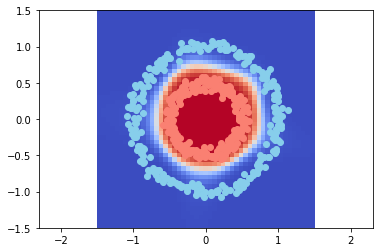

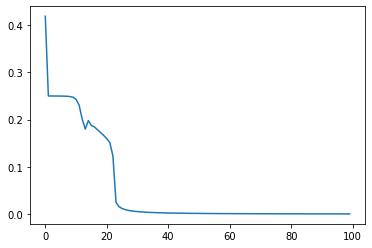

ciclo 2476 --> loss [[6.07326538e-04]
 [9.85313961e-01]
 [6.03133223e-02]
 [1.92805218e-02]
 [9.73917111e-01]
 [9.93020984e-01]
 [6.52783992e-03]
 [9.76305070e-01]
 [9.84390126e-01]
 [9.95808994e-01]
 [9.70079309e-01]
 [9.88770996e-01]
 [2.20587986e-02]
 [9.84394743e-01]
 [5.23128906e-03]
 [9.94565565e-01]
 [2.95724592e-02]
 [9.97123355e-01]
 [1.94229101e-02]
 [9.95508076e-01]
 [3.18554955e-02]
 [3.72313674e-03]
 [1.02873552e-02]
 [4.48705581e-03]
 [9.76104793e-01]
 [2.56328702e-02]
 [2.48762473e-02]
 [9.92520840e-01]
 [6.99561739e-03]
 [9.94912445e-01]
 [9.91084132e-01]
 [9.93445122e-01]
 [9.88404891e-01]
 [9.90875116e-01]
 [9.78831015e-01]
 [3.53743053e-02]
 [4.57263597e-03]
 [9.85127709e-01]
 [9.81996986e-01]
 [9.93720946e-01]
 [9.84232347e-01]
 [9.92106713e-01]
 [9.92288841e-01]
 [9.79689833e-01]
 [9.62131678e-01]
 [1.27733778e-02]
 [9.94593560e-01]
 [9.93616600e-01]
 [5.46175460e-02]
 [9.68218549e-01]
 [3.33035143e-03]
 [6.99743465e-02]
 [8.85928010e-04]
 [1.83746747e-03]
 [7.9146

In [27]:
import time
from IPython.display import clear_output

neural_n= create_nn(topology, sigm)

loss= []
for i in range(2500):    #1000 pasos de entrenamientos
  
  #entrenamos la red con un ratio de aprendizaje de 0.05
  pY = train(neural_n, X, Y, l2_cost,lr=0.05)
  print("ciclo {} --> loss {}".format(i,pY))  #imprimir el loss de cada una de las epochs (ciclos de entrenamiento)
  
  if i % 25 ==0:
    loss.append(l2_cost[0](pY,Y))
    
    # de aqui para abajo es lo requerido para visualizar los resultados
    res=50

    _x0= np.linspace(-1.5, 1.5, res)
    _x1= np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res,res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0,i1]= train(neural_n, np.array([[x0,x1]]),Y,l2_cost,train=False)[0][0]
    
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")
    
    plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1], c="skyblue")
    plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)


#Creando una red neuronal propia v2

---
Necesitaremos cuatro métodos de la librería NumPy de Python, estas son:

*  exp: la función exponencial
*  array: permite crear matrices
*  dot: multiplica matrices
*  random: proporciona números aleatorios


In [ ]:
from numpy import exp, array, random, dot
#Creamos la red neuronal simple  como una clase de python
class NeuralNetwork():
    def __init__(self):
        # Seed el generador de números aleatorios, con una raíz a fin de generar 
        # los mismo números aleatorios en cada proceso.
        random.seed(1)
 
        # Modelamos una sola neurona, con 3 conexiones de entrada y una conexión de salida
        # Asignamos los pesos aleatorios a una matriz de 3x1, con valores en el rango de -1 a 1
        # y significa 0
        self.synaptic_weights = 2 * random.random((3, 1)) - 1
 
    # La función Sigmoid, que describe una curva en forma de S
    # Se pasan la suma ponderada de las entradas a través de esta función para 
    # normalizarlos entre 0 y 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))
 
    # La derivada de la función Sigmoid.
    # Este es el gradiente de la función Sigmoid.
    # Indica la confianza que tenemos en el peso existente.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)
 
    # Entrenamos a la red neuronal a través de un proceso de prueba y error
    # Se realiza un ajuste de los pesos sinápticos cada vez.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in xrange(number_of_training_iterations):
            # Pasar el conjunto de entrenamiento a través de nuestra red neuronal (una sola neurona)
            output = self.think(training_set_inputs)
 
            # Calcular el error(La diferencia entre el resultado deseado
            # y el resultado obtenido).
            error = training_set_outputs - output
 
            # Multiplica el error por la entrada y nuevamente por el gradiente de la curva Sigmoid
            # Esto significa que los pesos menos confiables se están ajustando más
            # Esto significa que las entradas que son cero, no causan cambios en los pesos.
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
 
            # Ajuste de los pesos
            self.synaptic_weights += adjustment
 
    # La red neuronal piensa.
    def think(self, inputs):
        # Pasar las entradas a través de nuestra red neuronal (una neurona)
        return self.__sigmoid(dot(inputs, self.synaptic_weights))
 
 
if __name__ == "__main__":
 
    #Iniciar una red neuronal de una neurona
    neural_network = NeuralNetwork()
 
    print "Random starting synaptic weights: "
    print neural_network.synaptic_weights
 
    # El conjunto de pruebas. Tenemos cuatro ejemplos, cada uno consiste en 3 valores de entrada
    # y un valor de salida.
    training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = array([[0, 1, 1, 0]]).T
 
    # Entrenar la red neuronal utilizando el conjunto de entrenamiento.
    # Realizar 10000 veces y realizar un ajuste más pequeño cada vez.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)
 
    print "New synaptic weights after training: "
    print neural_network.synaptic_weights
 
    # Prueba la red neuronal con una nueva situación
    print "Considering new situation [1, 0, 0] -> ?: "
    print neural_network.think(array([1, 0, 0]))


#Red neuronal con Keras

Las compuertas XOR
---

*   XOR(0,0) = 0
*   XOR(0,1) = 1
*   XOR(1,0) = 1
*   XOR(1,1) = 0

##P0. programación clasica

In [34]:
#Creamos la funcion 
def predecir_XOR(entrada1, entrada2):
  if(entrada1 == 0 and entrada2 == 0):
    return 0
  elif (entrada1 == 0 and entrada2 == 1):
    return 1
  elif (entrada1 == 1 and entrada2 == 0):
    return 1
  elif (entrada1 == 1 and entrada2 == 1):
    return 0

predecir_XOR(1,0)
predecir_XOR(1,1)

0

##P1.importamos las clases que utilizaremos

In [35]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

#guardar los graficos en el cuaderno de jupyter
%matplotlib inline

##P2. creamos los arrays de entrada y salida

In [46]:
# cargamos las 4 combinaciones de las compuertas XOR
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
#training_data = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]], "float32")
 
# y estos son los resultados que se obtienen, en el mismo orden
target_data = np.array([[0],[1],[1],[0]], "float32")
#target_data = np.array([[0],[1],[1],[0],[1],[0],[0],[1]], "float32")

##P3. crearemos la arquitectura de nuestra red neuronal:

---

Primero creamos un modelo vació de tipo Sequential. Este modelo se refiere a que crearemos una serie de capas de neuronas secuenciales, “una delante de otra”
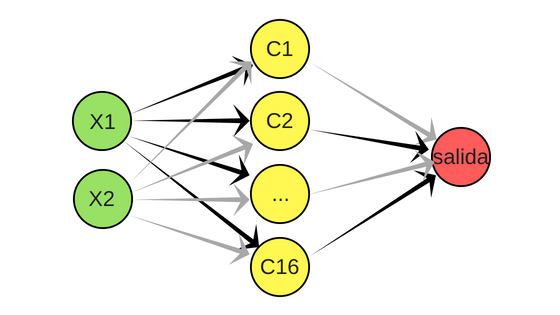

In [47]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))  #capa de entrada con 2 neuronas y una capa oculta con 16 neuronas
model.add(Dense(1, activation='sigmoid'))   # una capa con 1 neurona de salida y función de activación sigmoid

##p4.Entrenar la red!

In [48]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(training_data, target_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2713 - binary_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2709 - binary_accuracy: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2704 - binary_accuracy: 0.2500
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2700 - binary_accuracy: 0.2500
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2696 - binary_accuracy: 0.2500
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2691 - binary_accuracy: 0.2500
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2687 - binary_accuracy: 0.2500
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2683 - binary_accuracy: 0.2500
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2679 - binary_accuracy: 0.2500
Epoch 10/1000
1/1 [==============================] - 0s

##P5.Evaluar la red neuronal y Predecimos

In [49]:
scores = model.evaluate(training_data, target_data)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1/1 [==============================] - 0s 1ms/step - loss: 0.0326 - binary_accuracy: 1.0000

binary_accuracy: 100.00%


##P6. guardar la red

In [50]:
# serializar el modelo a JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serializar los pesos a HDF5
model.save_weights("model.h5")
print("Modelo Guardado!")

Modelo Guardado!


##P7.Cargar modelo

In [52]:
 from keras.models import model_from_json
# cargar json y crear el modelo
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo
loaded_model.load_weights("model.h5")
print("Cargado modelo desde disco.")
 
# Compilar modelo cargado y listo para usar.
loaded_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])

Cargado modelo desde disco.
